In [1]:
import pandas as pd
import pandasql as pdsql
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## EDA

In [2]:
df1 = pd.read_csv('takehome_user_engagement.csv')
df1.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [3]:
#General check 
display(df1.info())
print('-'*53)
display(df1.describe())
print('-'*53)
print('unique users: '+str(len(df1.user_id.value_counts())))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


None

-----------------------------------------------------


,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


-----------------------------------------------------
unique users: 8823


* user_id: range 1-12,000 as expected. However, not every id has an engagement, and therefore the total length of uniuqe value counts:8823. Let's confirm this later with the users data
* each record is a visit, so visited are all 1s

In [4]:
print('Timeframe:')
print(min(df1.time_stamp)+' to '+ max(df1.time_stamp))
#convert object to datetime:
df1['time'] = pd.to_datetime(df1.time_stamp)
print('-'*53)
display(df1.time.describe())
print('-'*53)
display(df1.head())

Timeframe:
2012-05-31 08:20:06 to 2014-06-06 14:58:50
-----------------------------------------------------


count                  207917
unique                 207220
top       2014-02-05 03:09:54
freq                        2
first     2012-05-31 08:20:06
last      2014-06-06 14:58:50
Name: time, dtype: object

-----------------------------------------------------


,time_stamp,user_id,visited,time
0,2014-04-22 03:53:30,1,1,2014-04-22 03:53:30
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04
2,2013-11-29 03:45:04,2,1,2013-11-29 03:45:04
3,2013-12-09 03:45:04,2,1,2013-12-09 03:45:04
4,2013-12-25 03:45:04,2,1,2013-12-25 03:45:04


In [5]:
#user data, should be 12,000 in total
df2 = pd.read_csv('takehome_users.csv',encoding='latin-1')
df2.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,4/22/14 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,11/15/13 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,3/19/13 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,5/21/13 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,1/17/13 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [6]:
#general check
display(df2.info())
print('-'*53)
display(df2.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


None

-----------------------------------------------------


,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


* last_session_creation_time: some users don't have the last login. The length of non-null data should be the same with total number of unique users in user engagment data: 8823. It's consistent.
* invited_by_user_id: some might just sign up by themselves, therefore null for some, reasonable

In [7]:
#convert object to datetime, match the user_engagement
df2['creation_t'] = pd.to_datetime(df2.creation_time)
df2['lastlogin'] = pd.to_datetime(df2['last_session_creation_time'], unit = 's')
df2[['creation_t', 'lastlogin']].describe()

,creation_t,lastlogin
count,12000,8823
unique,11930,8821
top,2014-04-16 09:27:00,2014-06-04 21:21:37
freq,3,2
first,2012-05-31 00:43:00,2012-05-31 08:20:06
last,2014-05-30 23:59:00,2014-06-06 14:58:50


## Defining an 'adopted user'

In [8]:
# adopted user: logged into the product on 3 seperate days in at least one 7-day period 
# actual of the day doesn't matter
df1_new = df1
df1_new['day'] = pd.to_datetime(df1_new.time.map(lambda x: format(x,'%Y-%m-%d')))
df1_new = df1_new.drop(['time_stamp','time'], axis = 1)
#we don't want to count the multiple logins within the same day, so only keep 1 for each day for each user
df1_new = df1_new.drop_duplicates(subset = ['user_id','day','visited'], keep = 'last').set_index('day')
display(df1_new.head())
df1_new.shape

,user_id,visited
day,,
2014-04-22,1,1
2013-11-15,2,1
2013-11-29,2,1
2013-12-09,2,1
2013-12-25,2,1


(207917, 2)

In [9]:
# groupby user_id, and 7-day period, sum the visits 
q1 = df1_new.groupby(['user_id', pd.Grouper(freq='7D')]).sum()
display(q1.head(10))
print('-'*53)
# take the max for each user, if max >= 3, then yes 
q2 = q1.groupby(['user_id'])['visited'].max() 
display(q2)

visited
user_id day                
1       2014-04-17        1
2       2013-11-14        1
        2013-11-28        1
        2013-12-05        1
        2013-12-19        1
        2013-12-26        1
        2014-01-02        1
        2014-01-30        1
        2014-02-06        2
        2014-02-13        2

-----------------------------------------------------


user_id
1        1
2        2
3        1
4        1
5        1
6        1
7        1
10       7
11       1
13       1
14       1
17       1
19       1
20       2
21       1
22       1
23       1
24       1
25       2
27       1
28       1
29       1
30       1
31       1
33       2
36       1
37       1
41       1
42       7
43       4
        ..
11961    4
11962    1
11963    1
11964    6
11965    4
11967    7
11968    1
11969    7
11974    1
11975    7
11977    1
11979    1
11980    2
11981    2
11982    1
11983    1
11984    1
11986    1
11987    1
11988    5
11989    1
11990    1
11991    2
11992    1
11995    1
11996    1
11997    1
11998    1
11999    1
12000    1
Name: visited, Length: 8823, dtype: int64

In [10]:
#create a new dataframe indicating whether a user is a 'adopted user":1
df1_final = q2.reset_index()
df1_final['adopted'] = np.where(df1_final['visited']>=3, 1, 0)
df1_final.drop('visited',axis =1, inplace = True)
df1_final.head()

,user_id,adopted
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


## Predicting future adopted users

In [11]:
# sql query pandas dataframes
pysqldf = lambda q: pdsql.sqldf(q, globals())

In [12]:
#join first
q3 = pysqldf("""
             SELECT df2.*,
                    m.adopted 
             FROM df2
             LEFT JOIN df1_final m
             ON m.user_id = df2.object_id
             """)
display(q3.head())

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_t,lastlogin,adopted
0,1,4/22/14 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:00.000000,2014-04-22 03:53:30.000000,0.0
1,2,11/15/13 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:00.000000,2014-03-31 03:45:04.000000,0.0
2,3,3/19/13 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,2013-03-19 23:14:00.000000,2013-03-19 23:14:52.000000,0.0
3,4,5/21/13 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,2013-05-21 08:09:00.000000,2013-05-22 08:09:28.000000,0.0
4,5,1/17/13 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,2013-01-17 10:14:00.000000,2013-01-22 10:14:20.000000,0.0


In [13]:
# copy the dataframe, and add another feature to include time of usage 
q4 = q3
q4['timeused']=(pd.to_datetime(q4['lastlogin'])-pd.to_datetime(q4['creation_t'])).dt.days
q4['timeused'].fillna(0, inplace = True)
q4['adopted'].fillna(0, inplace = True)
q4.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_t,lastlogin,adopted,timeused
0,1,4/22/14 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:00.000000,2014-04-22 03:53:30.000000,0.0,0.0
1,2,11/15/13 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:00.000000,2014-03-31 03:45:04.000000,0.0,136.0
2,3,3/19/13 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,2013-03-19 23:14:00.000000,2013-03-19 23:14:52.000000,0.0,0.0
3,4,5/21/13 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,2013-05-21 08:09:00.000000,2013-05-22 08:09:28.000000,0.0,1.0
4,5,1/17/13 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,2013-01-17 10:14:00.000000,2013-01-22 10:14:20.000000,0.0,5.0


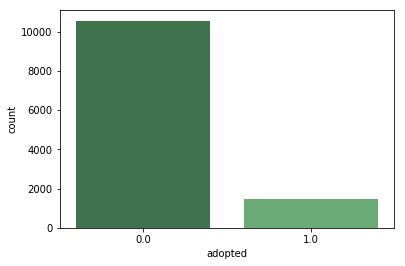

In [14]:
# not- adopted vs adopted ~= 1:0.2 
sns.countplot(x="adopted", data=q4, palette="Greens_d")
plt.show()

In [15]:
#prepare data for classification
#get rid of user specific info like ids and name and emails 
#keep creation_source, opted_in_to_mailing_list,enabled_for_marketing_drip, org_id, timeused, and process categorical
X_df = q4[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id', 'timeused']]
X_df = pd.get_dummies(X_df, columns = ['creation_source', 'org_id'], drop_first=True)
X_df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,timeused,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,org_id_1,org_id_2,org_id_3,...,org_id_407,org_id_408,org_id_409,org_id_410,org_id_411,org_id_412,org_id_413,org_id_414,org_id_415,org_id_416
0,1,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,136.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X = X_df.values
y = q4.adopted.values

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

[[2564   86]
 [  14  336]]


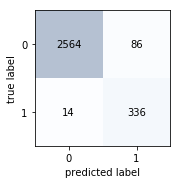

             precision    recall  f1-score   support

        0.0       0.99      0.97      0.98      2650
        1.0       0.80      0.96      0.87       350

avg / total       0.97      0.97      0.97      3000



In [19]:
rf = RandomForestClassifier(n_estimators=100,n_jobs=-1, random_state=0,
                            min_samples_split=5,min_samples_leaf=1,max_depth=10,class_weight={0:0.2,1:1})
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
fig, ax = plot_confusion_matrix(cm)
plt.show()
print(classification_report(y_test, y_pred))

From the confusion matrix we can see, for this inbalanced dataset (adopted vs not-adopted is around 0.2:1), we use the random forest to achieve:
* high precision: how many predicted as 1 are actually 1: 336/(86+336) = 0.80
* very high recall : of all true 1s, how much are predicted as 1: 336/(14+336) = 0.96

Feature ranking:
1. feature 2 (0.512818)
2. feature 4 (0.079450)
3. feature 6 (0.019706)
4. feature 3 (0.014163)
5. feature 5 (0.011734)
6. feature 0 (0.011655)
7. feature 12 (0.010565)
8. feature 167 (0.009569)
9. feature 241 (0.007832)
10. feature 393 (0.007445)
11. feature 1 (0.007382)
12. feature 20 (0.006217)
13. feature 123 (0.005980)
14. feature 398 (0.005821)
15. feature 8 (0.005456)
16. feature 372 (0.005158)
17. feature 78 (0.004890)
18. feature 29 (0.004890)
19. feature 288 (0.004578)
20. feature 71 (0.004286)


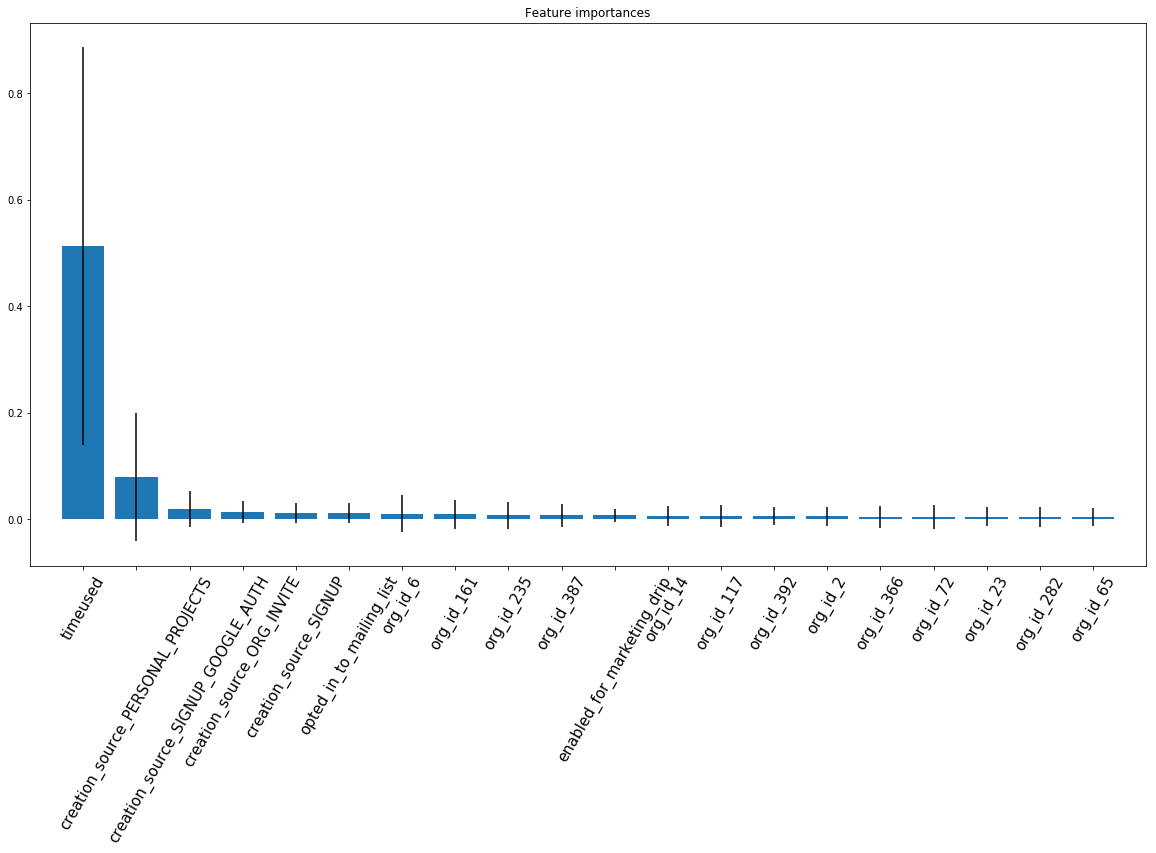

In [25]:
#identify the important features
importances = rf.feature_importances_
number_to_keep = 20
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:number_to_keep]

print("Feature ranking:")
for f in range(len(indices)):
   print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(len(indices)), X_df.columns[indices], rotation=60, size=15)
plt.xlim([-1, len(indices)])
plt.show()

From the plot above we can see that 
* timeused is the most important feature
* creation_source, among which presonal_project is a much higher indicator of future user adoption than rest of the categories 
* opted_in_to_mailing_list, enabled_for_marketing_drip, and org_id are not too much of indicators in the model
* we can still further plot some graphs to see how the adoptions vary with each categories for creation source, email list, and marketing drip

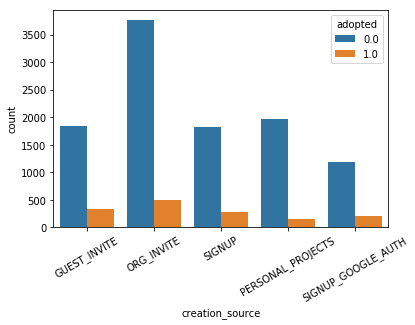

In [26]:
sns.countplot( x="creation_source", hue='adopted', data =q4);
plt.xticks(rotation =30)
plt.show()

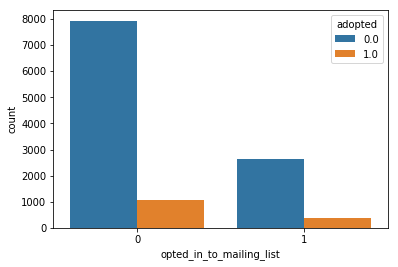

In [22]:
sns.countplot( x="opted_in_to_mailing_list", hue='adopted', data =q4);
plt.show()

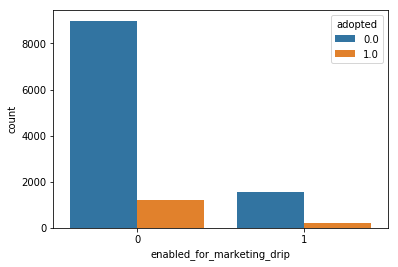

In [23]:
sns.countplot( x="enabled_for_marketing_drip", hue='adopted', data =q4);
plt.show()

We can see from the above plots that:
* creation_source: organization invites has the largest total number of adoption, while guest has larger proportions
* opted_in_to_mailing_list: 'no' has larger total number of adoption, while 'yes' has higher proportion
* enabled_for_marketing_drip: 'no' has larger total number of adoption, the proportions are approximately the same

##  Summary

For predicting future user adoption:
* timeused: the most important feature. Self-defined, which takes last login time minus the creation time
* creation_source: some creation source, for example, personal project might be more indicative of adoption or not than others, which can be shown from important features plot; while the organization invites has the total largest number of adopted users, and guest invites might have the largest proportion of adopted users. Depending on objectives we want to achieve, whether to increase the proportion or the total numbers of adoption, we might want to put into our efforts in promoting different sign-up strategies accordingly
* opted_in_to_mailing_list, org_id and enabled_for_marketing_drip are generally weak in our model prediction. However, if we have extra time and efforts to spare, depending on whether we want to maximize the absolute number or the proportion of adoption, we can get rig of mailing list(for absolute number) or keep the mailing list (for prportion) accordingly, for exmaple. 